## Forest Cover Type Prediction

### Goal

The goal of the Project is to predict seven different cover types in four different wilderness areas of the Roosevelt National Forest of Northern Colorado with the best accuracy.

Given elevation, hydrologic, soil, and sunlight data can we predict what type of tree would be in a small
patch of forest? Our project attempts to predict the predominant type of tree in sections of wooded area.
Understanding forest composition is a valuable aspect of managing the health and vitality of our wilderness
areas. Classifying cover type can help further research regarding forest fire susceptibility, the spread of the
Mountain Pine Beetle infestion, and de/reforestation concerns.

### Workflow Steps

To classify cover types and reply to the initiating question, where to find fantastic trees and how to detect them, the below steps will be followed:

1. Clean and Format Data
2. Exploratory Data Analysis
3. Feature Engineering & Selection
4. Compare Several Machine Learning Models
5. Perform Hyperparameter Tuning on the Models
6. Interpret Model Results
7. Summary & Conclusions

### Data Dictionary

The study area includes four wilderness areas located in the Roosevelt National Forest of northern Colorado. Each observation is a 30m x 30m patch. We need to predict an integer classification for the forest cover type. The seven types are:

1 - Spruce/Fir <br />
2 - Lodgepole Pine <br />
3 - Ponderosa Pine <br />
4 - Cottonwood/Willow <br />
5 - Aspen <br />
6 - Douglas-fir <br />
7 - Krummholz <br />

Data Fields <br />

Elevation - Elevation in meters <br />
Aspect - Aspect in degrees azimuth <br />
Slope - Slope in degrees <br />
Horizontal_Distance_To_Hydrology - Horz Dist to nearest surface water features <br />
Vertical_Distance_To_Hydrology - Vert Dist to nearest surface water features <br />
Horizontal_Distance_To_Roadways - Horz Dist to nearest roadway <br />
Hillshade_9am (0 to 255 index) - Hillshade index at 9am, summer solstice <br />
Hillshade_Noon (0 to 255 index) - Hillshade index at noon, summer solstice <br />
Hillshade_3pm (0 to 255 index) - Hillshade index at 3pm, summer solstice <br />
Horizontal_Distance_To_Fire_Points - Horz Dist to nearest wildfire ignition points <br />
Wilderness_Area (4 binary columns, 0 = absence or 1 = presence) - Wilderness area designation <br />
Soil_Type (40 binary columns, 0 = absence or 1 = presence) - Soil Type designation <br />
Cover_Type (7 types, integers 1 to 7) - Forest Cover Type designation <br />

The wilderness areas are:

1 - Rawah Wilderness Area
2 - Neota Wilderness Area
3 - Comanche Peak Wilderness Area
4 - Cache la Poudre Wilderness Area

The soil types ( 1 to 40) are:

1 Cathedral family - Rock outcrop complex, extremely stony.<br />
2 Vanet - Ratake families complex, very stony.<br />
3 Haploborolis - Rock outcrop complex, rubbly.<br />
4 Ratake family - Rock outcrop complex, rubbly.<br />
5 Vanet family - Rock outcrop complex complex, rubbly.<br />
6 Vanet - Wetmore families - Rock outcrop complex, stony.<br />
7 Gothic family.<br />
8 Supervisor - Limber families complex.<br />
9 Troutville family, very stony.<br />
10 Bullwark - Catamount families - Rock outcrop complex, rubbly.<br />
11 Bullwark - Catamount families - Rock land complex, rubbly.<br />
12 Legault family - Rock land complex, stony.<br />
13 Catamount family - Rock land - Bullwark family complex, rubbly.<br />
14 Pachic Argiborolis - Aquolis complex.<br />
15 unspecified in the USFS Soil and ELU Survey.<br />
16 Cryaquolis - Cryoborolis complex.<br />
17 Gateview family - Cryaquolis complex.<br />
18 Rogert family, very stony.<br />
19 Typic Cryaquolis - Borohemists complex.<br />
20 Typic Cryaquepts - Typic Cryaquolls complex.<br />
21 Typic Cryaquolls - Leighcan family, till substratum complex.<br />
22 Leighcan family, till substratum, extremely bouldery.<br />
23 Leighcan family, till substratum - Typic Cryaquolls complex.<br />
24 Leighcan family, extremely stony.<br />
25 Leighcan family, warm, extremely stony.<br />
26 Granile - Catamount families complex, very stony.<br />
27 Leighcan family, warm - Rock outcrop complex, extremely stony.<br />
28 Leighcan family - Rock outcrop complex, extremely stony.<br />
29 Como - Legault families complex, extremely stony.<br />
30 Como family - Rock land - Legault family complex, extremely stony.<br />
31 Leighcan - Catamount families complex, extremely stony.<br />
32 Catamount family - Rock outcrop - Leighcan family complex, extremely stony.<br />
33 Leighcan - Catamount families - Rock outcrop complex, extremely stony.<br />
34 Cryorthents - Rock land complex, extremely stony.<br />
35 Cryumbrepts - Rock outcrop - Cryaquepts complex.<br />
36 Bross family - Rock land - Cryumbrepts complex, extremely stony.<br />
37 Rock outcrop - Cryumbrepts - Cryorthents complex, extremely stony.<br />
38 Leighcan - Moran families - Cryaquolls complex, extremely stony.<br />
39 Moran family - Cryorthents - Leighcan family complex, extremely stony.<br />
40 Moran family - Cryorthents - Rock land complex, extremely stony.<br />

## Data Analysis

In [1]:
#import all relevant packages
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

%matplotlib inline

In [2]:
#reading the file
df = pd.read_csv(r'../Dataset/covtype.csv',index_col=None)
pd.set_option('max_columns', None)
df.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581012 entries, 0 to 581011
Data columns (total 55 columns):
Elevation                             581012 non-null int64
Aspect                                581012 non-null int64
Slope                                 581012 non-null int64
Horizontal_Distance_To_Hydrology      581012 non-null int64
Vertical_Distance_To_Hydrology        581012 non-null int64
Horizontal_Distance_To_Roadways       581012 non-null int64
Hillshade_9am                         581012 non-null int64
Hillshade_Noon                        581012 non-null int64
Hillshade_3pm                         581012 non-null int64
Horizontal_Distance_To_Fire_Points    581012 non-null int64
Wilderness_Area1                      581012 non-null int64
Wilderness_Area2                      581012 non-null int64
Wilderness_Area3                      581012 non-null int64
Wilderness_Area4                      581012 non-null int64
Soil_Type1                            581012 non-

In [4]:
df.describe()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
count,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000
mean,2959.365301,155.656807,14.103704,269.428217,46.418855,2350.146611,212.146049,223.318716,142.528263,1980.291226,0.448865,0.051434,0.436074,0.063627,0.005217,0.012952,0.008301,0.021335,0.002749,0.011316,0.000181,0.000308,0.001974,0.056168,0.021359,0.051584,0.030001,0.001031,0.000005,0.004897,0.005890,0.003268,0.006921,0.015936,0.001442,0.057439,0.099399,0.036622,0.000816,0.004456,0.001869,0.001628,0.198356,0.051927,0.044175,0.090392,0.077716,0.002773,0.003255,0.000205,0.000513,0.026803,0.023762,0.015060,2.051471
std,279.984734,111.913721,7.488242,212.549356,58.295232,1559.254870,26.769889,19.768697,38.274529,1324.195210,0.497379,0.220882,0.495897,0.244087,0.072039,0.113066,0.090731,0.144499,0.052356,0.105775,0.013442,0.017550,0.044387,0.230245,0.144579,0.221186,0.170590,0.032092,0.002272,0.069804,0.076518,0.057077,0.082902,0.125228,0.037950,0.232681,0.299197,0.187833,0.028551,0.066605,0.043193,0.040318,0.398762,0.221879,0.205483,0.286743,0.267725,0.052584,0.056957,0.014310,0.022641,0.161508,0.152307,0.121791,1.396504
min,1859.000000,0.000000,0.000000,0.000000,-173.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2809.000000,58.000000,9.000000,108.000000,7.000000,1106.000000,198.000000,213.000000,119.000000,1024.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,2996.000000,127.000000,13.000000,218.000000,30.000000,1997.000000,218.000000,226.000000,143.000000,1710.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000

In [5]:
print('Data Dimension:')
print('Number of Records:', df.shape[0])
print('Number of Features:', df.shape[1])

Data Dimension:
Number of Records: 581012
Number of Features: 55


In [6]:
#Names of columns
print('Feature Names')
print(df.columns)

Feature Names
Index(['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
       'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
       'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
       'Horizontal_Distance_To_Fire_Points', 'Wilderness_Area1',
       'Wilderness_Area2', 'Wilderness_Area3', 'Wilderness_Area4',
       'Soil_Type1', 'Soil_Type2', 'Soil_Type3', 'Soil_Type4', 'Soil_Type5',
       'Soil_Type6', 'Soil_Type7', 'Soil_Type8', 'Soil_Type9', 'Soil_Type10',
       'Soil_Type11', 'Soil_Type12', 'Soil_Type13', 'Soil_Type14',
       'Soil_Type15', 'Soil_Type16', 'Soil_Type17', 'Soil_Type18',
       'Soil_Type19', 'Soil_Type20', 'Soil_Type21', 'Soil_Type22',
       'Soil_Type23', 'Soil_Type24', 'Soil_Type25', 'Soil_Type26',
       'Soil_Type27', 'Soil_Type28', 'Soil_Type29', 'Soil_Type30',
       'Soil_Type31', 'Soil_Type32', 'Soil_Type33', 'Soil_Type34',
       'Soil_Type35', 'Soil_Type36', 'Soil_Type37', 'Soil_Type38',
       'Soil_Type39'

In [7]:
#checking for any missing value
df.isnull().sum()

Elevation                             0
Aspect                                0
Slope                                 0
Horizontal_Distance_To_Hydrology      0
Vertical_Distance_To_Hydrology        0
Horizontal_Distance_To_Roadways       0
Hillshade_9am                         0
Hillshade_Noon                        0
Hillshade_3pm                         0
Horizontal_Distance_To_Fire_Points    0
Wilderness_Area1                      0
Wilderness_Area2                      0
Wilderness_Area3                      0
Wilderness_Area4                      0
Soil_Type1                            0
Soil_Type2                            0
Soil_Type3                            0
Soil_Type4                            0
Soil_Type5                            0
Soil_Type6                            0
Soil_Type7                            0
Soil_Type8                            0
Soil_Type9                            0
Soil_Type10                           0
Soil_Type11                           0


In [8]:
df.skew()

Elevation                              -0.817596
Aspect                                  0.402628
Slope                                   0.789273
Horizontal_Distance_To_Hydrology        1.140437
Vertical_Distance_To_Hydrology          1.790250
Horizontal_Distance_To_Roadways         0.713679
Hillshade_9am                          -1.181147
Hillshade_Noon                         -1.063056
Hillshade_3pm                          -0.277053
Horizontal_Distance_To_Fire_Points      1.288644
Wilderness_Area1                        0.205618
Wilderness_Area2                        4.061595
Wilderness_Area3                        0.257822
Wilderness_Area4                        3.575561
Soil_Type1                             13.736670
Soil_Type2                              8.615358
Soil_Type3                             10.838630
Soil_Type4                              6.625176
Soil_Type5                             18.995243
Soil_Type6                              9.240061
Soil_Type7          

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54]), <a list of 55 Text xticklabel objects>)

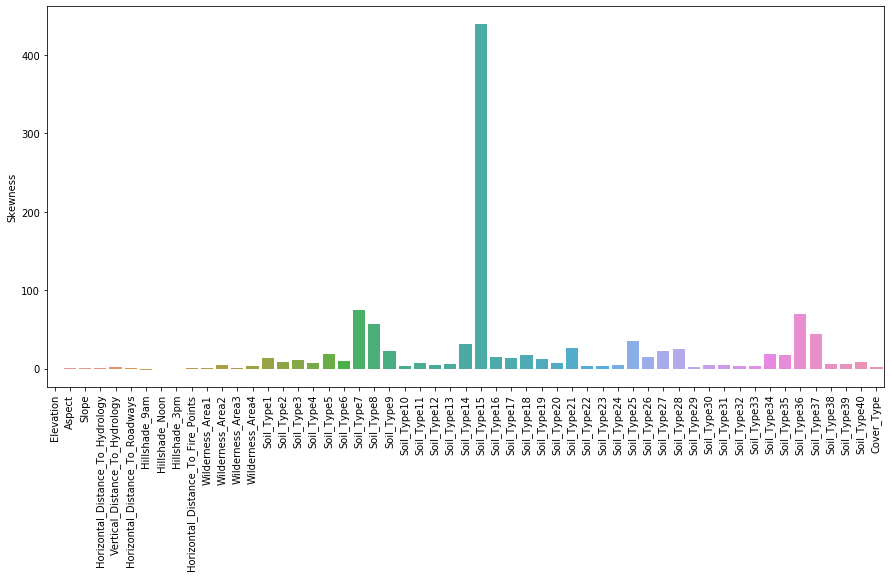

In [9]:
skew=df.skew()
skew_df=pd.DataFrame(skew,index=None,columns=['Skewness'])
plt.figure(figsize=(15,7))
sns.barplot(x=skew_df.index,y='Skewness',data=skew_df)
plt.xticks(rotation=90)

#### Inference : Some of the values are highly skewed, especially Soil_Type15 as in the above plot which needs to be corrected or transformed

In [10]:
#Checking percent wise distribution of each class
class_distribution=df.groupby('Cover_Type').size()
for i,num in enumerate(class_distribution):
    percentage=(num/class_distribution.sum())*100
    print('Cover_Type',class_distribution.index[i])
    print('%.2f'% percentage,'%')

Cover_Type 1
36.46 %
Cover_Type 2
48.76 %
Cover_Type 3
6.15 %
Cover_Type 4
0.47 %
Cover_Type 5
1.63 %
Cover_Type 6
2.99 %
Cover_Type 7
3.53 %


#### Inference : Cover_Type 1 and 2 comprises of 87%, dominates the area while Cover_Type 4 with minimal contribution compared to the rest

### We are applying Feature Selection to form mini datasets and perform further analysis

In [11]:
df.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5


In [12]:
# sns.pairplot(df,hue='Cover_Type')

#### Forming mini datasets for further exploration:

continuous data -> Continuous data ( From column Elevation to Horizontal_Distance_To_Fire_Points)<br /> 
binary data -> All binary data (From Wilderness_Area1 to Soil_Type 40 )<br />
Only the Wilderness -> Wilderness 1 to Wilderness 4<br />
Only Soil Data -> Soil_Type 1 to Soil_Type 40<br />

In [13]:
#generating subset of dataframe by list slicing to form the above group
continuous_df=df.loc[:,'Elevation':'Horizontal_Distance_To_Fire_Points']

binary_df=df.loc[:,'Wilderness_Area1':'Soil_Type40']

wilderness_df=df.loc[:,'Wilderness_Area1': 'Wilderness_Area4']

soil_df=df.loc[:,'Soil_Type1':'Soil_Type40']

### Exploratory Data Analysis with Plots

In [14]:
continuous_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581012 entries, 0 to 581011
Data columns (total 10 columns):
Elevation                             581012 non-null int64
Aspect                                581012 non-null int64
Slope                                 581012 non-null int64
Horizontal_Distance_To_Hydrology      581012 non-null int64
Vertical_Distance_To_Hydrology        581012 non-null int64
Horizontal_Distance_To_Roadways       581012 non-null int64
Hillshade_9am                         581012 non-null int64
Hillshade_Noon                        581012 non-null int64
Hillshade_3pm                         581012 non-null int64
Horizontal_Distance_To_Fire_Points    581012 non-null int64
dtypes: int64(10)
memory usage: 44.3 MB


In [15]:
#checking shape of continuous_df with respect to target class
df['Cover_Type']=df['Cover_Type'].astype('category') #To convert target class into category

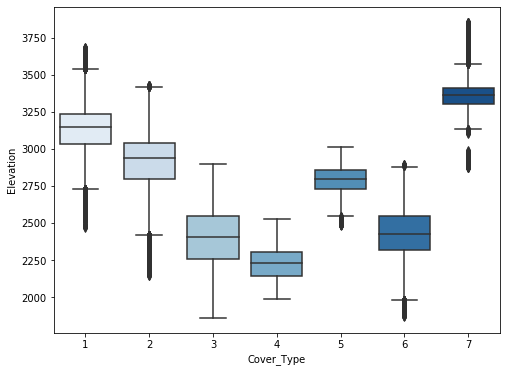

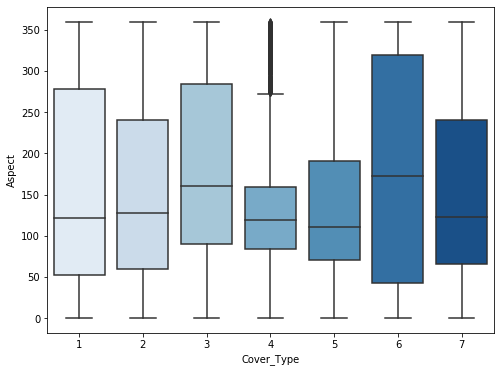

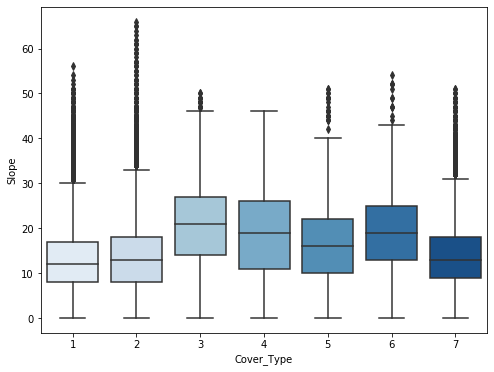

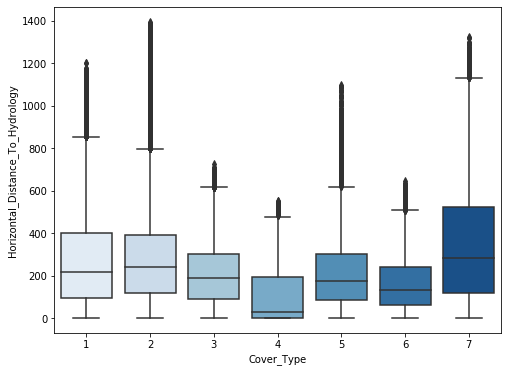

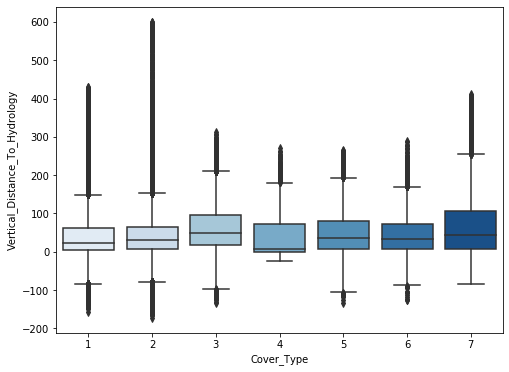

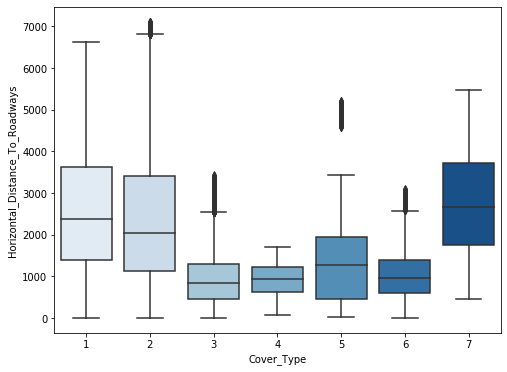

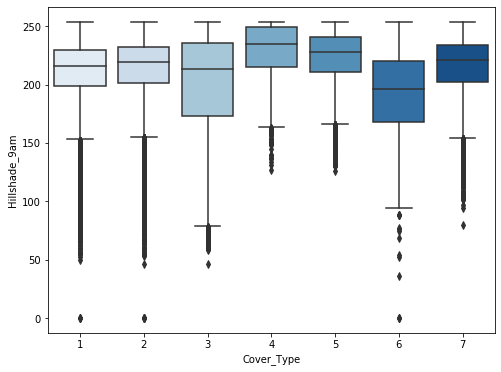

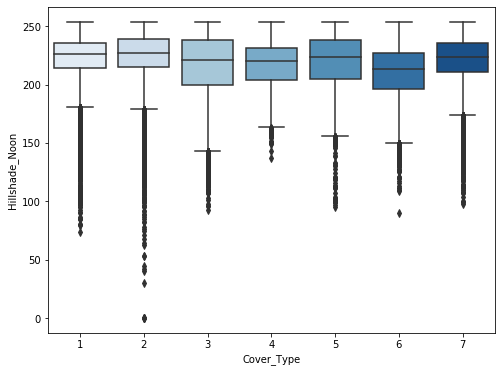

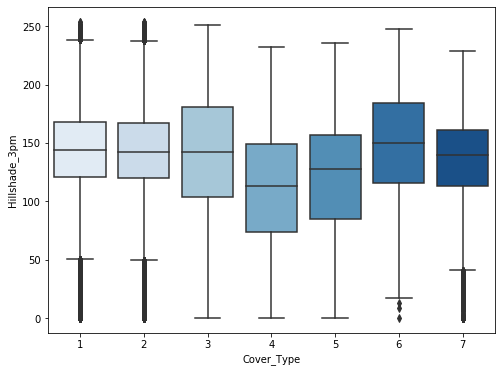

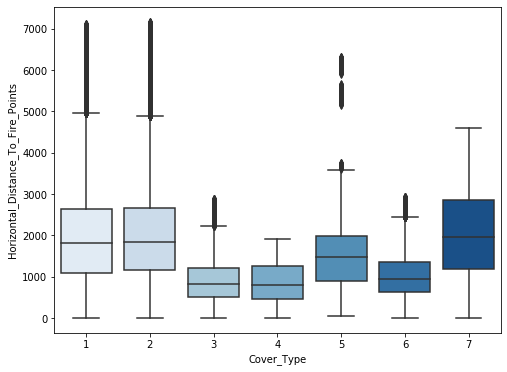

In [16]:
#looping over each column in the dataframe
for i, col in enumerate(continuous_df.columns):
    plt.figure(i,figsize=(8,6))
    sns.boxplot(x=df['Cover_Type'], y=col, data=df, palette="Blues")

#### Inference - from the box plot we can see that features like Elevation, Aspect, Slope, horizontal_distance_to_roadways may be influential features on the cover types of forest.. The box plot also helps to identify the outliers for other features.

Now, we plot a heat map to identify the correlation.

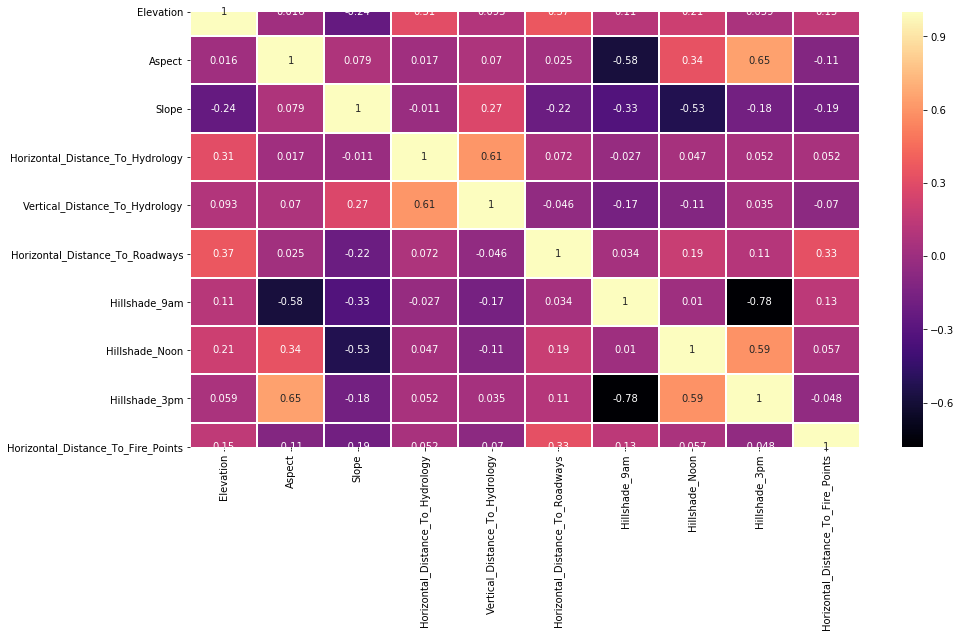

In [17]:
plt.figure(figsize=(15,8))
sns.heatmap(continuous_df.corr(),cmap='magma',linecolor='white',linewidths=1,annot=True)

#### Diving more into correlation to identify strong correlation is observed between pairs as it will give us an opportunity to reduce the feature set through transformations such as PCA

In [18]:
import numpy

#sets the number of features considered
size = 10 

#create a dataframe with only 'size' features
data=df.iloc[:,:size] 

#get the names of all the columns
cols=data.columns 

# Calculates pearson co-efficient for all combinations
data_corr = data.corr()

# Set the threshold to select only only highly correlated attributes
threshold = 0.5

# List of pairs along with correlation above threshold
corr_list = []

#Search for the highly correlated pairs
for i in range(0,size): #for 'size' features
    for j in range(i+1,size): #avoid repetition
        if (data_corr.iloc[i,j] >= threshold and data_corr.iloc[i,j] < 1) or (data_corr.iloc[i,j] < 0 and data_corr.iloc[i,j] <= -threshold):
            corr_list.append([data_corr.iloc[i,j],i,j]) #store correlation and columns index

#Sort to show higher ones first            
s_corr_list = sorted(corr_list,key=lambda x: -abs(x[0]))

#Print correlations and column names
for v,i,j in s_corr_list:
    print ("%s and %s = %.2f" % (cols[i],cols[j],v))

Hillshade_9am and Hillshade_3pm = -0.78
Aspect and Hillshade_3pm = 0.65
Horizontal_Distance_To_Hydrology and Vertical_Distance_To_Hydrology = 0.61
Hillshade_Noon and Hillshade_3pm = 0.59
Aspect and Hillshade_9am = -0.58
Slope and Hillshade_Noon = -0.53


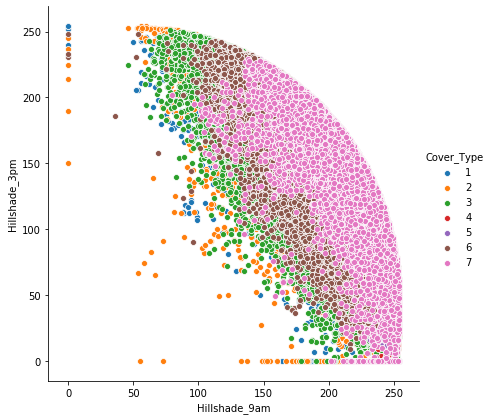

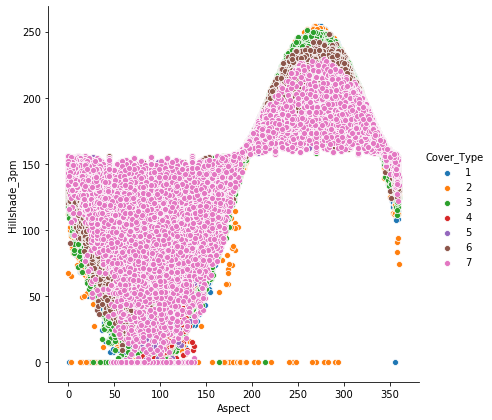

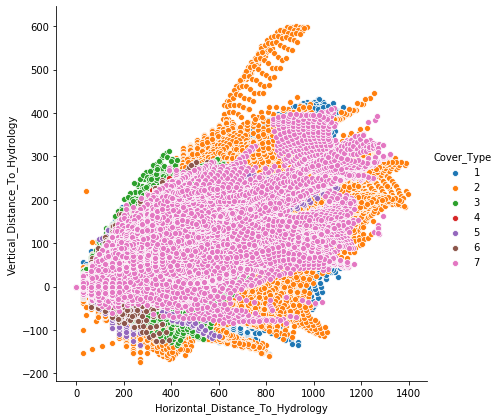

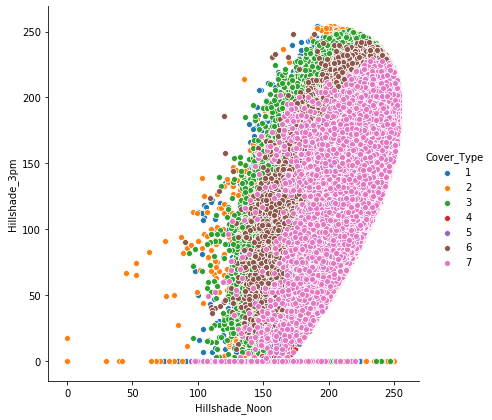

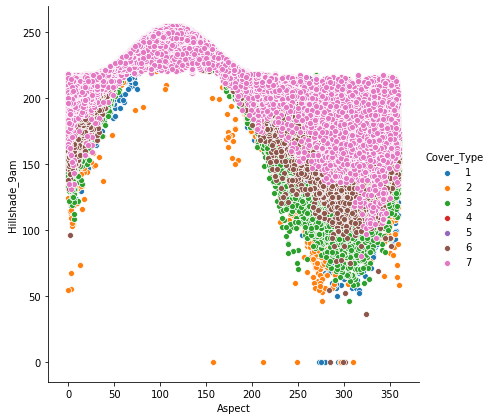

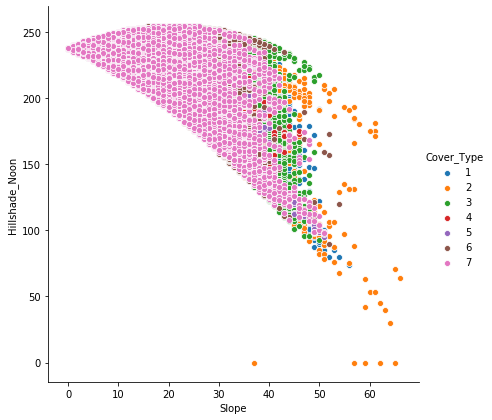

In [19]:
# Scatter plot of only the highly correlated pairs to show predominant cover types in each
for v,i,j in s_corr_list:
    sns.pairplot(df, hue="Cover_Type", height=6, x_vars=cols[i],y_vars=cols[j] )
    plt.show()

#### Inference : The plots show to which class does a point belong to. The class distribution overlaps in the plots.  

#### Observation from the above graph  

Hillshade patterns give a nice ellipsoid patterns with each other.<br />
Aspect and Hillshades attributes form a sigmoid pattern.<br />
Horizontal and vertical distance to hydrology give an almost linear pattern.<br />

In [20]:
binary_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581012 entries, 0 to 581011
Data columns (total 44 columns):
Wilderness_Area1    581012 non-null int64
Wilderness_Area2    581012 non-null int64
Wilderness_Area3    581012 non-null int64
Wilderness_Area4    581012 non-null int64
Soil_Type1          581012 non-null int64
Soil_Type2          581012 non-null int64
Soil_Type3          581012 non-null int64
Soil_Type4          581012 non-null int64
Soil_Type5          581012 non-null int64
Soil_Type6          581012 non-null int64
Soil_Type7          581012 non-null int64
Soil_Type8          581012 non-null int64
Soil_Type9          581012 non-null int64
Soil_Type10         581012 non-null int64
Soil_Type11         581012 non-null int64
Soil_Type12         581012 non-null int64
Soil_Type13         581012 non-null int64
Soil_Type14         581012 non-null int64
Soil_Type15         581012 non-null int64
Soil_Type16         581012 non-null int64
Soil_Type17         581012 non-null int64
Soil_Ty

C:\Users\souma\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until


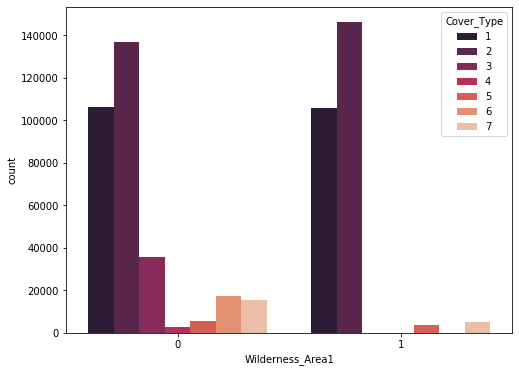

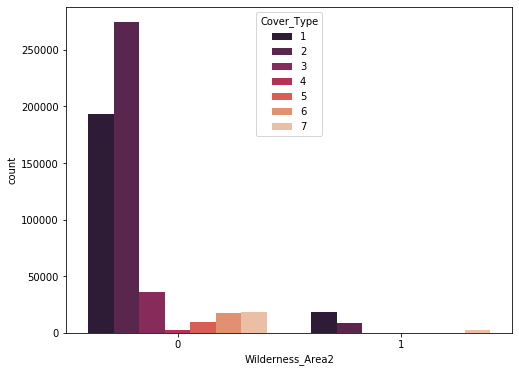

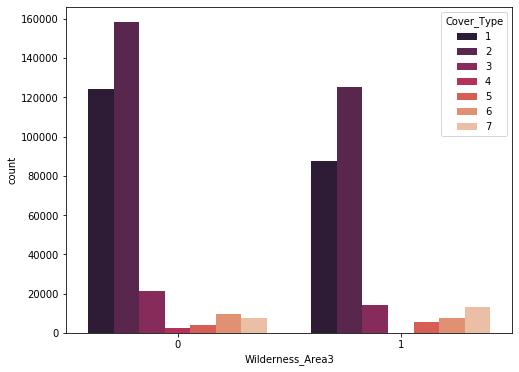

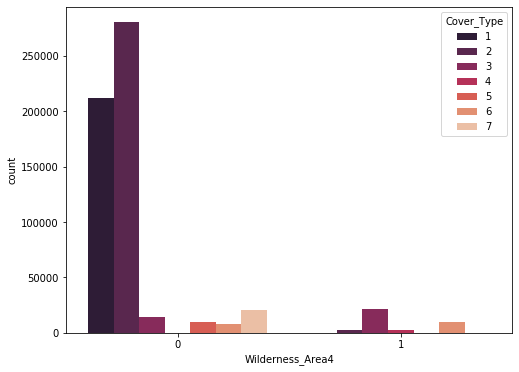

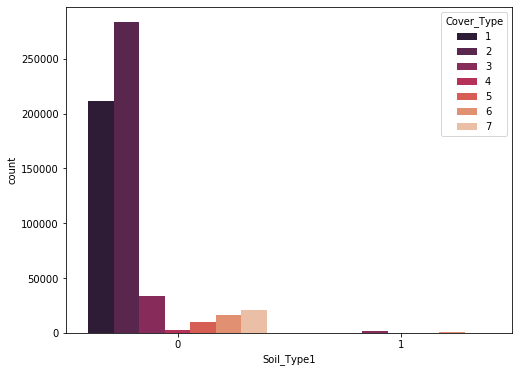

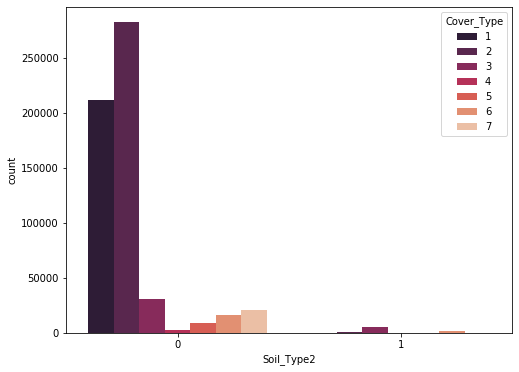

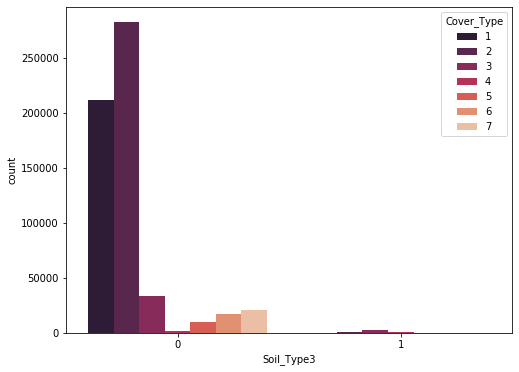

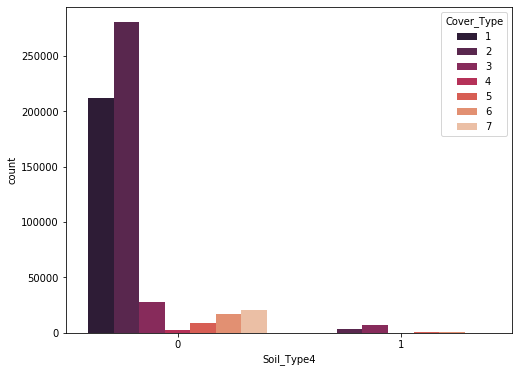

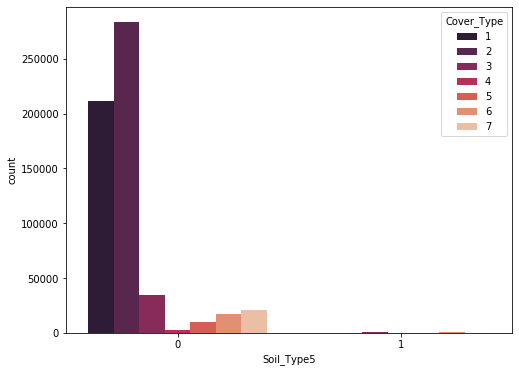

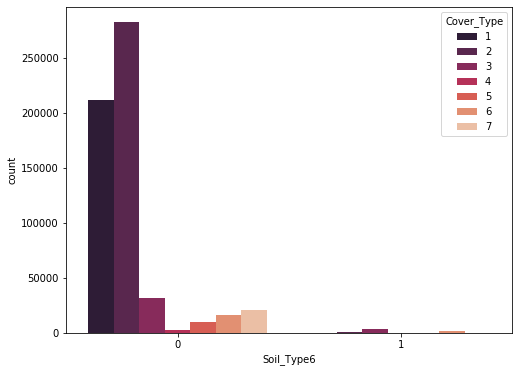

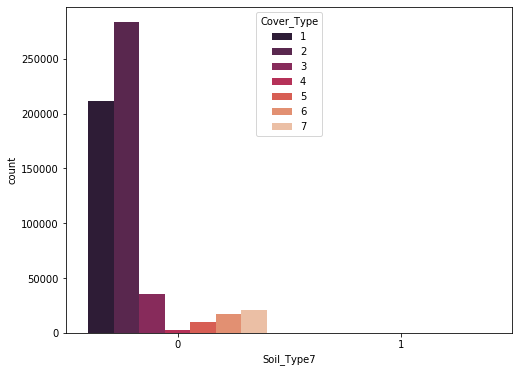

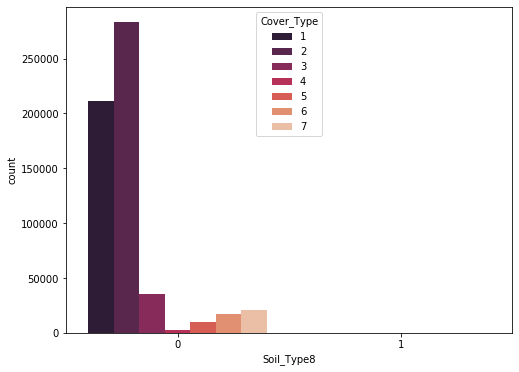

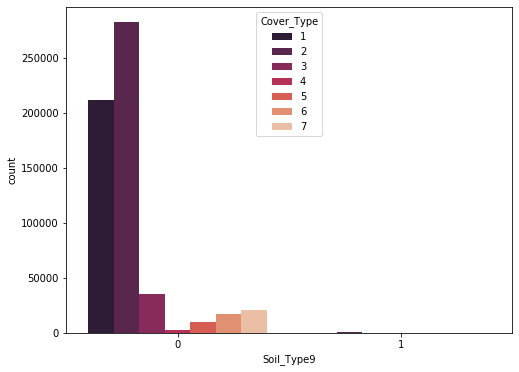

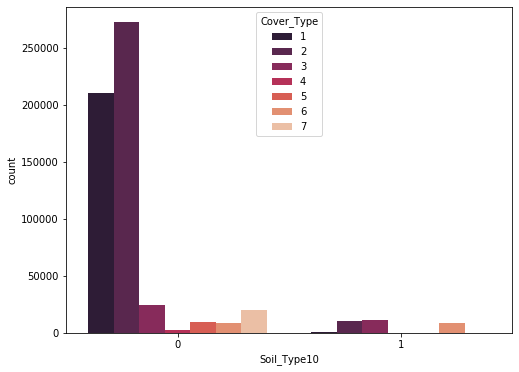

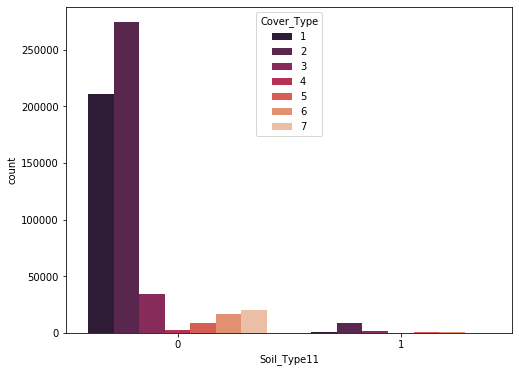

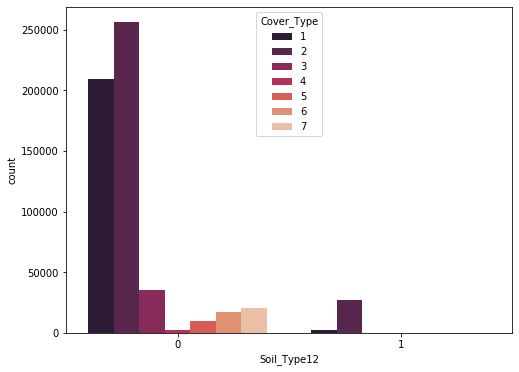

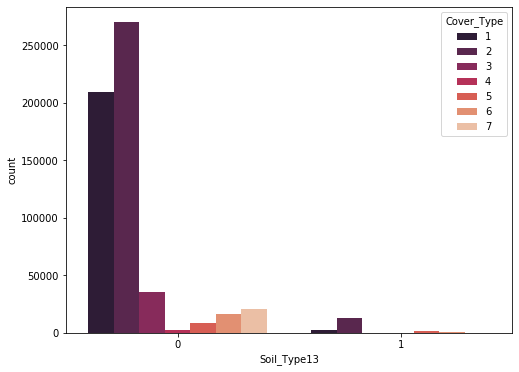

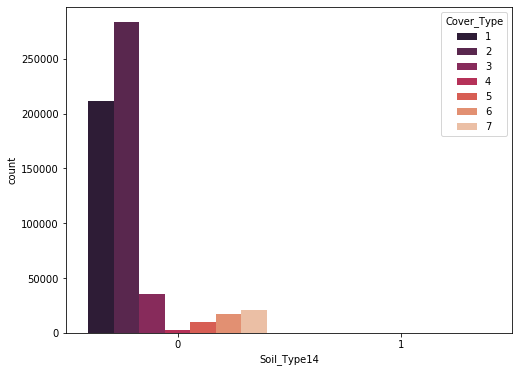

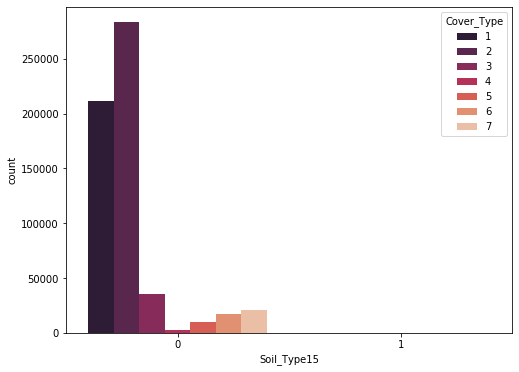

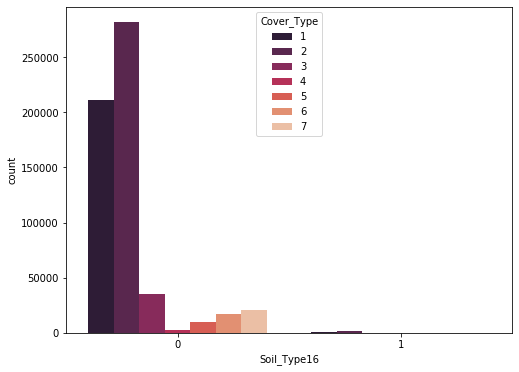

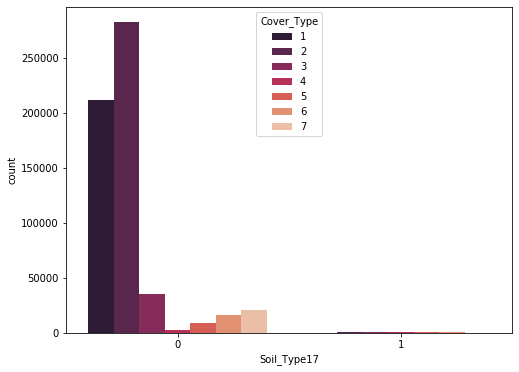

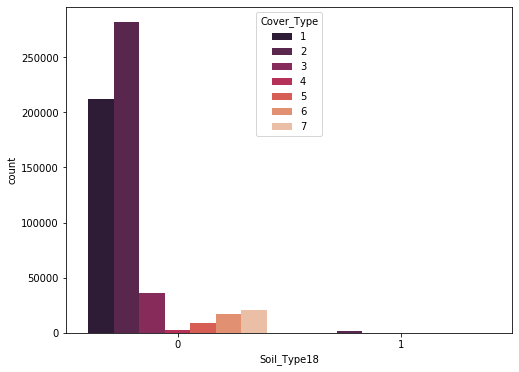

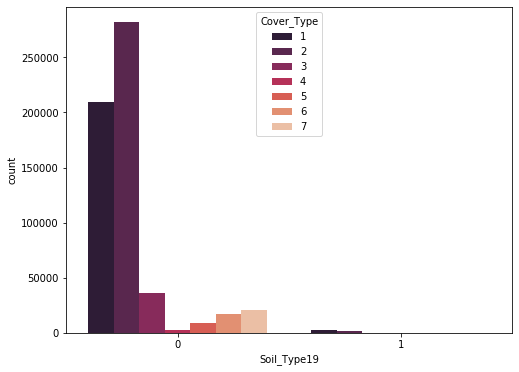

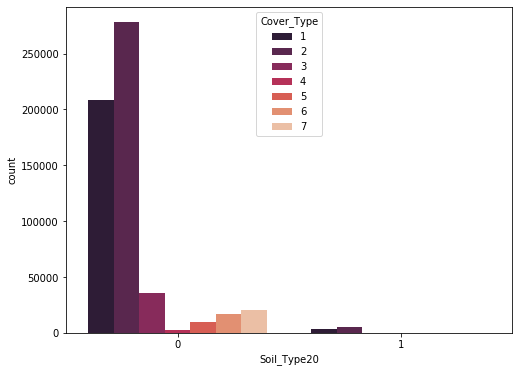

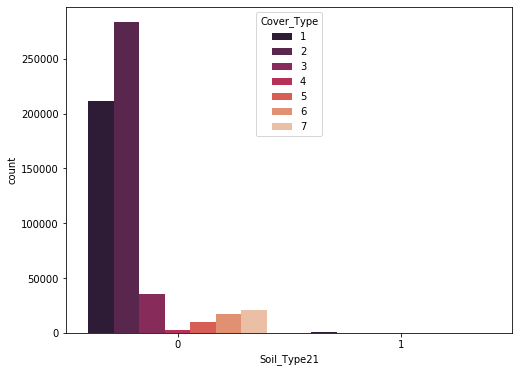

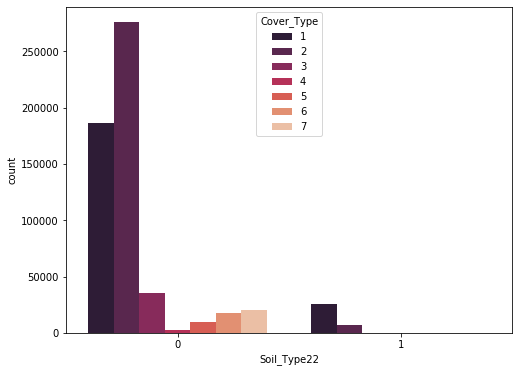

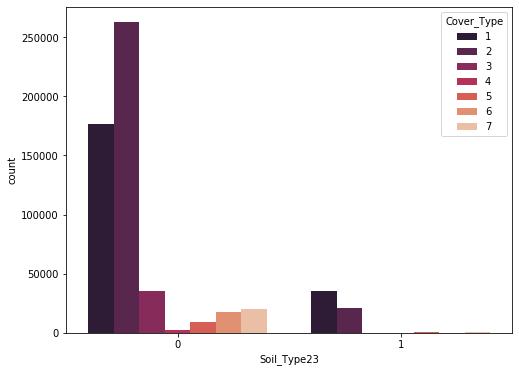

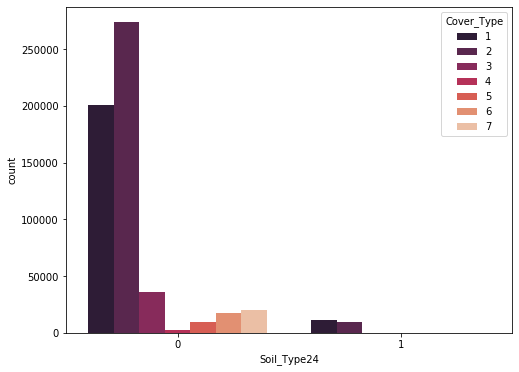

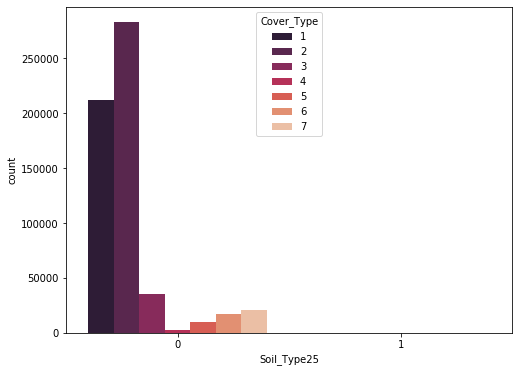

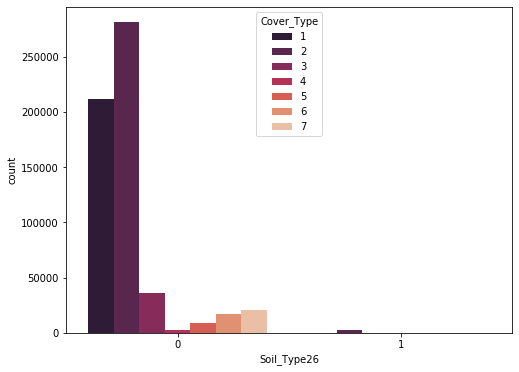

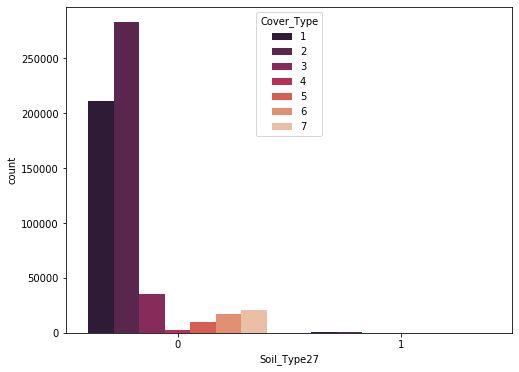

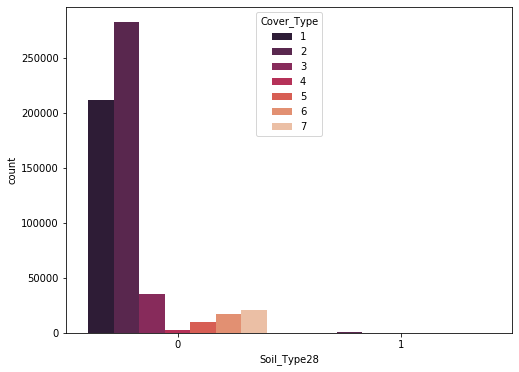

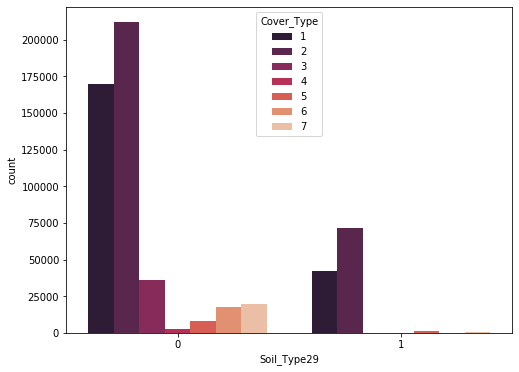

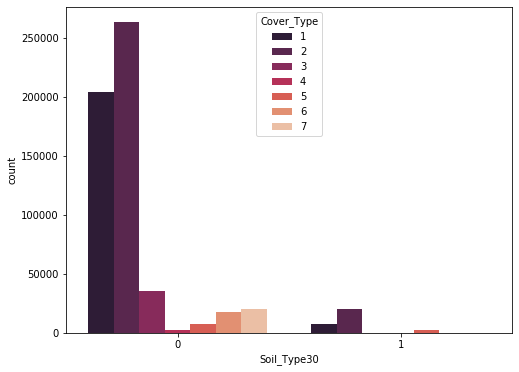

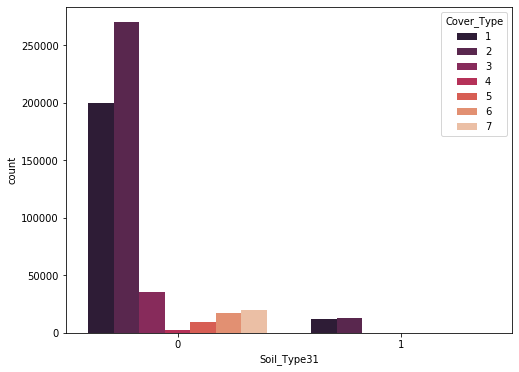

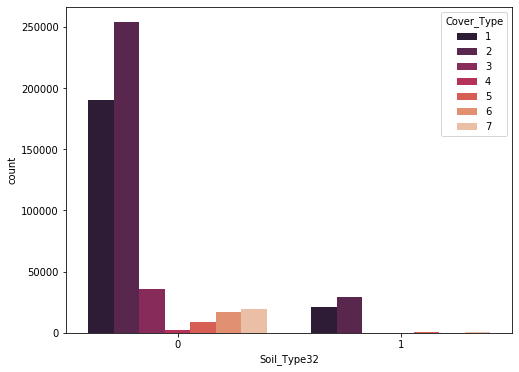

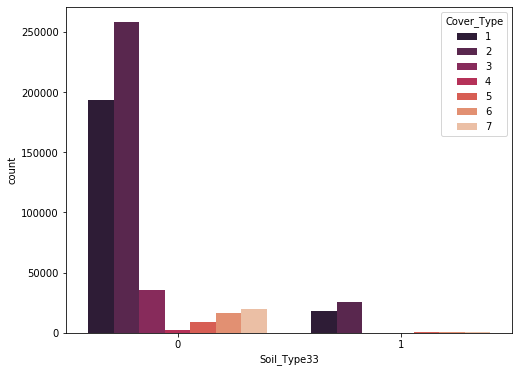

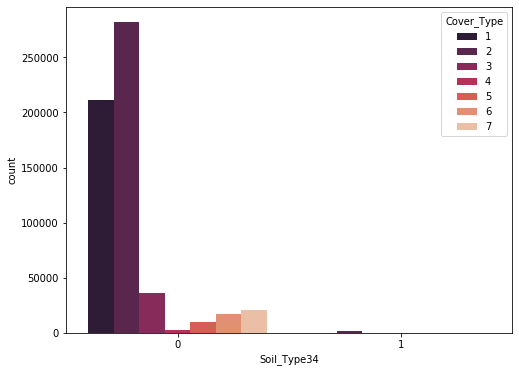

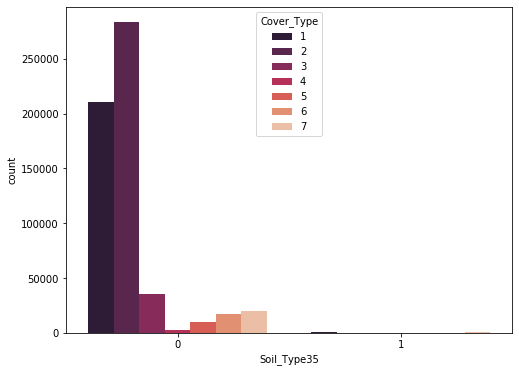

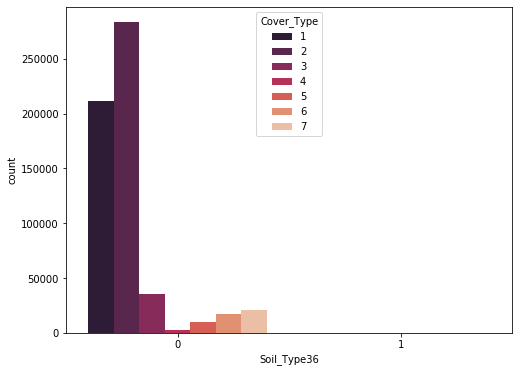

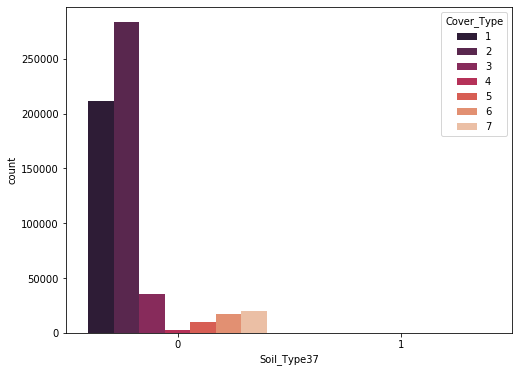

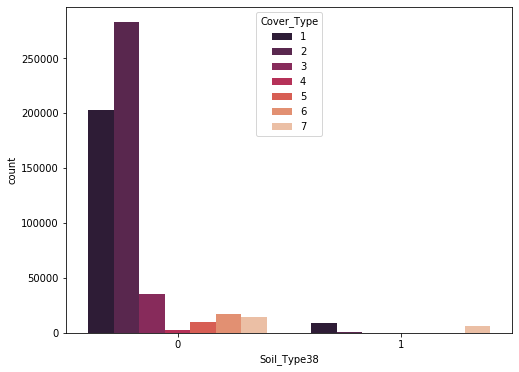

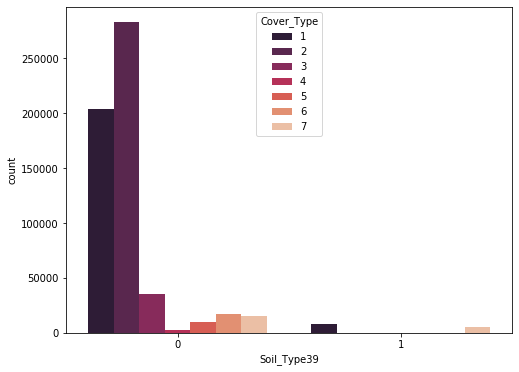

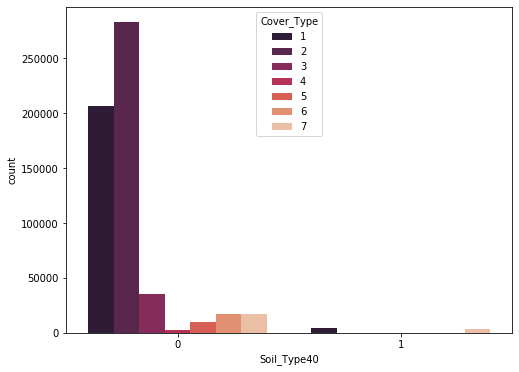

In [21]:
#looping over binary data set which was grouped above
for i, col in enumerate(binary_df.columns):
    plt.figure(i,figsize=(8,6))
    sns.countplot(x=col, hue=df['Cover_Type'] ,data=df, palette="rocket")

#### Inference : So the above count plot displays the count of each feature [0,1] corresponding to Cover_Type.

In [22]:
#method developed to build wilderness_df count plot
def wilderness(j):
    for i in wilderness_df.columns:
        if j[i]==1:
            return i

In [23]:
#building dataframe X for plotting
df['Wilderness_']=wilderness_df.apply(wilderness, axis=1)

(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

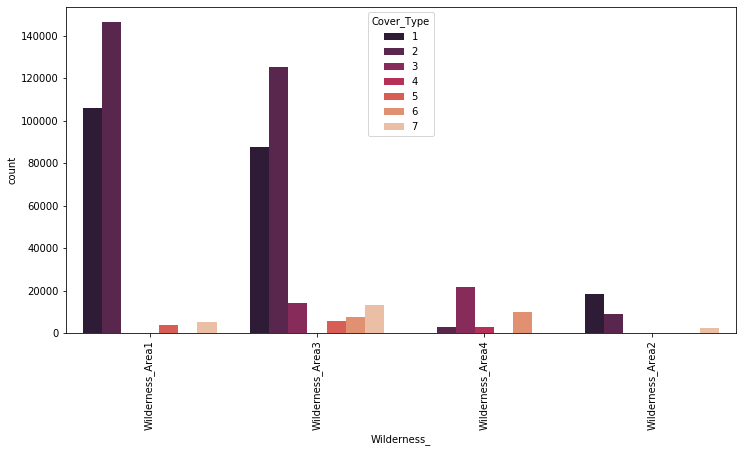

In [24]:
# countplot with Wilderness data type
plt.figure(figsize=(12,6))
sns.countplot(x='Wilderness_', hue='Cover_Type',data=df, palette="rocket")
plt.xticks(rotation=90)

In [25]:
#method developed to build soil_df count plot
def Soiltype(j):
    for i in soil_df.columns:
        if j[i]==1:
            return i      

In [26]:
#building dataframe X for plotting
df['Soil_']=soil_df.apply(Soiltype, axis=1)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39]), <a list of 40 Text xticklabel objects>)

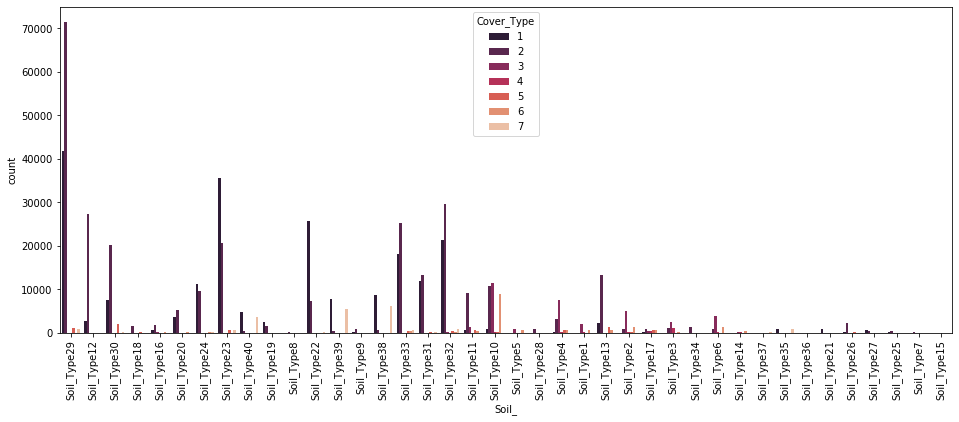

In [27]:
# countplot with Wilderness data type
plt.figure(figsize=(16,6))
sns.countplot(x='Soil_', hue='Cover_Type',data=df, palette="rocket")
plt.xticks(rotation=90)

### Data Cleaning
Removal of unnecessary columns from the dataset that doesn't help in predicting our dependent variable

In [28]:
#droping the columns with low standard deviation/high skewness as performed above
remaining=['Soil_Type7','Soil_Type8','Soil_Type14','Soil_Type15',
     'Soil_Type21','Soil_Type25','Soil_Type28','Soil_Type36','Soil_Type37']


In [29]:
#removing all above columns with low standard deviation as it will not impact our dependent variable
df.drop(remaining, axis=1, inplace=True)

In [30]:
# we will also remove Hillshade_3pm because of highly neagtive -0.78 co-related value
df.drop('Hillshade_3pm',axis=1, inplace=True)

In [31]:
#Final Data Set after cleaning
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581012 entries, 0 to 581011
Data columns (total 47 columns):
Elevation                             581012 non-null int64
Aspect                                581012 non-null int64
Slope                                 581012 non-null int64
Horizontal_Distance_To_Hydrology      581012 non-null int64
Vertical_Distance_To_Hydrology        581012 non-null int64
Horizontal_Distance_To_Roadways       581012 non-null int64
Hillshade_9am                         581012 non-null int64
Hillshade_Noon                        581012 non-null int64
Horizontal_Distance_To_Fire_Points    581012 non-null int64
Wilderness_Area1                      581012 non-null int64
Wilderness_Area2                      581012 non-null int64
Wilderness_Area3                      581012 non-null int64
Wilderness_Area4                      581012 non-null int64
Soil_Type1                            581012 non-null int64
Soil_Type2                            581012 non-

### Data Modeling

Here we split our main data set into two forms X and Y <br />

X -> List of independent variables <br />
Y -> Dependent Variables<br />

In [32]:
X=df.loc[:,'Elevation':'Soil_Type40']
y=df['Cover_Type']

In [33]:
#Splitting the data into  train and test
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=101)